# Brief look at Cartopy

Cartopy is a Python package that provides easy creation of maps with matplotlib.

#### Cartopy *vs* Basemap

* Cartopy is replacing Basemap, which is nearing its [end-of-life in 2020](https://matplotlib.org/basemap/users/intro.html#cartopy-new-management-and-eol-announcement). All new software development should try to use Cartopy whenever possible.
* Cartopy is better integrated with matplotlib and in a more active development state
* Proper handling of datelines in cartopy - one of the bugs in basemap (example: [Challenger circumnavigation](http://ocefpaf.github.io/python4oceanographers/blog/2013/09/23/cartopy/))
* Cartopy offers powerful vector data handling by integrating shapefile reading with Shapely capabilities
* Basemap: gridline labels for any projection; limited to a few in cartopy ([workaround](http://stackoverflow.com/questions/27962953/cartopy-axis-label-workaround) for Lambert Conic)
* Basemap has a map scale bar feature (can be [buggy](https://github.com/matplotlib/basemap/issues/165)); still [not implemented](https://github.com/SciTools/cartopy/issues/490) in cartopy, but there are some messy [workarounds](http://stackoverflow.com/questions/32333870/how-can-i-show-a-km-ruler-on-a-cartopy-matplotlib-plot)

As for the standard matplotlib plots, we first need to import `pyplot` submodule and make the graphical output appear in the notebook:

In order to create a map with cartopy and matplotlib, we typically need to import pyplot from matplotlib and cartopy's crs (coordinate reference system) submodule. These are typically imported as follows:

In [1]:
import matplotlib.pyplot as plt

Then let's import the cartopy

In [2]:
import cartopy

In addition, we import cartopy's **coordinate reference system** submodule:

In [3]:
import cartopy.crs as ccrs

## Creating GeoAxes

* Cartopy-matplotlib interface is set up via the `projection` keyword when constructing `Axes` / `SubAxes`
* The resulting instance (`cartopy.mpl.geoaxes.GeoAxesSubplot`) has new methods specific to drawing cartographic data, e.g. **coastlines**:

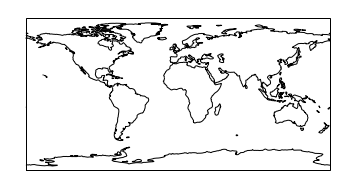

In [4]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

In [5]:
print('axes type:', type(ax))

axes type: <class 'cartopy.mpl.geoaxes.GeoAxesSubplot'>


Here we are using a Plate Carrée projection, which is one of *equidistant cylindrical projections*.

A full list of Cartopy projections is available at http://scitools.org.uk/cartopy/docs/latest/crs/projections.html.

### Putting georeferenced data on a map

* Use the standard matplotlib plotting routines with an additional `transform` keyword.
* The value of the `transform` argument should be the cartopy coordinate reference system *of the data being plotted*

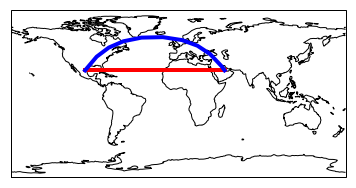

In [6]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_global()
plt.plot([-100, 50], [25, 25], linewidth=4, color='r', transform=ccrs.PlateCarree())
plt.plot([-100, 50], [25, 25], linewidth=4, color='b', transform=ccrs.Geodetic())

Notice that unless we specify a map extent (we did so via the **``set_global``** method in this case) the map will zoom into the range of the plotted data.

### Decorating the map

We can add grid lines and tick labels to the map using the `gridlines()` method:

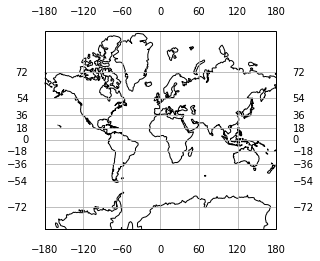

In [7]:
ax = plt.axes(projection=ccrs.Mercator())
ax.coastlines()
gl = ax.gridlines(draw_labels=True)

Unfortunately, gridline labels work only in PlateCarree and Mercator projections.

We can control the specific tick values by using matplotlib's locator object, and the formatting can be controlled with matplotlib formatters:

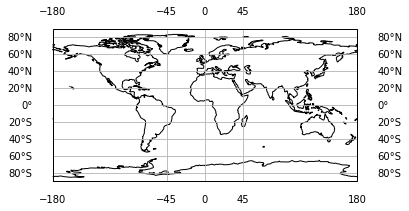

In [8]:
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LATITUDE_FORMATTER

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
gl = ax.gridlines(draw_labels=True)

gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
gl.yformatter = LATITUDE_FORMATTER

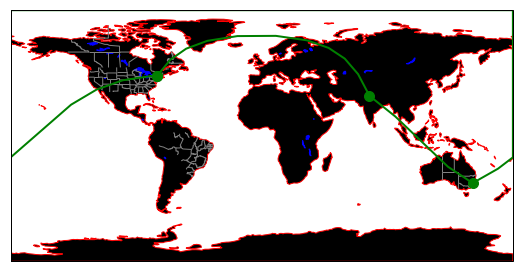

In [9]:
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
ax.set_global()

lons = -75, 77.2, 151.2, -75
lats = 43, 28.6, -33.9, 43


ax.plot(lons, lats,
        color='green', linewidth=2, marker='o', ms=10,
        transform=ccrs.Geodetic())

# feature = cartopy.feature.LAND
feature = cartopy.feature.NaturalEarthFeature(name='land', category='physical',
                                              scale='110m',
                                              edgecolor='red', facecolor='black')
ax.add_feature(feature)
_ = ax.add_feature(cartopy.feature.LAKES, facecolor='b')
states = cartopy.feature.NaturalEarthFeature(category='cultural', scale='50m', facecolor='none',
                                             name='admin_1_states_provinces_lines')
_ = ax.add_feature(states, edgecolor='gray')

### Plotting layers directly from Web Map Service (WMS) and Web Map Tile Service (WMTS)

In [10]:
url = 'http://map1c.vis.earthdata.nasa.gov/wmts-geo/wmts.cgi'

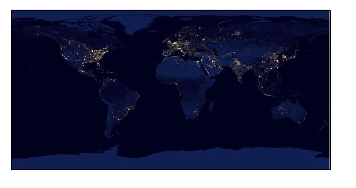

In [11]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_wmts(url, 'VIIRS_CityLights_2012')

## Exercise

In [12]:
import numpy as np

In [13]:
x = np.linspace(310, 390, 25)
y = np.linspace(-24, 25, 35)
x2d, y2d = np.meshgrid(x, y)

data = np.cos(np.deg2rad(y2d) * 4) + np.sin(np.deg2rad(x2d) * 4)

#### Idea 1
1. Use data in a rotated pole coordinate system
2. Create a proper CRS, plot it
3. Plot the data on a different map with a different projection (e.g., Plate Carree)

In [14]:
rot_crs = ccrs.RotatedPole(177.5, 37.5)

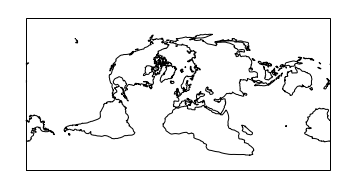

In [15]:
ax = plt.axes(projection=rot_crs)
ax.coastlines()

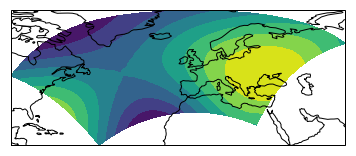

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
ax.contourf(x2d, y2d, data, transform=rot_crs)
ax.coastlines()